In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [5]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_data()

y = 0


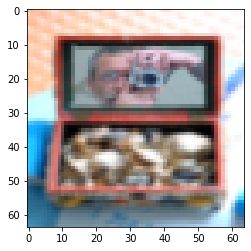

In [7]:
index = 15
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [8]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T
Y_train_flatten = Y_train_orig.reshape(Y_train_orig.shape[0],-1)

X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T
Y_test_flatten = Y_test_orig.reshape(Y_train_orig.shape[0],-1)

X_train = X_train_flatten/255
Y_train = Y_train_flatten/255

X_test = X_test_flatten/255
Y_test = Y_test_flatten/255

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 209
number of test examples = 50
X_train shape: (12288, 209)
Y_train shape: (1, 209)
X_test shape: (12288, 50)
Y_test shape: (1, 50)


In [9]:
def placeholders(n_x,n_y):
    
    X = tf.placeholder(tf.float32, shape = [n_x,None],name = 'X')
    Y = tf.placeholder(tf.float32, shape = [n_y,None],name = 'Y')
    
    return X,Y

In [10]:
def initialize_parameters():
    #creating a model with 12288,25,25,1
    
    W1 = tf.get_variable("W1",[25,12288],initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1",[25,1],initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2",[25,25],initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2",[25,1],initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3",[1,25],initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3",[1,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters
    

In [11]:
def forward_propagation(X,parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    
    
    return Z3

In [13]:
def compute_cost(Z3,Y):
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = logits, labels = labels))
    
    return cost

In [14]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.005,
          num_epochs = 1500):
    
    ops.reset_default_graph()
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    
    X,Y = placeholders(n_x,n_y)
    
    parameters = initialize_parameters()
    
    
    Z3 = forward_propagation(X,parameters)
    
    
    cost = compute_cost(Z3,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    
    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            
            _,curr_cost = sess.run([optimizer,cost],feed_dict={X:X_train,
                                                          Y:Y_train})
            
            
            if(epoch % 100== 0 and epoch != 0):
                print("Cost at epoch : ",epoch, " is : ",curr_cost)
                costs.append(curr_cost)
            
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        return parameters
                                


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Cost at epoch :  100  is :  0.25933507
Cost at epoch :  200  is :  0.10785587
Cost at epoch :  300  is :  0.013541872
Cost at epoch :  400  is :  0.011918719
Cost at epoch :  500  is :  0.011463243
Cost at epoch :  600  is :  0.011130623
Cost at epoch :  700  is :  0.010863057
Cost at epoch :  800  is :  0.010639719
Cost at epoch :  900  is :  0.010447827
Cost at epoch :  1000  is :  0.0102791665
Cost at epoch :  1100  is :  0.010128618
Cost at epoch :  1200  is :  0.009993168
Cost at epoch :  1300  is :  0.009871109
Cost at epoch :  14

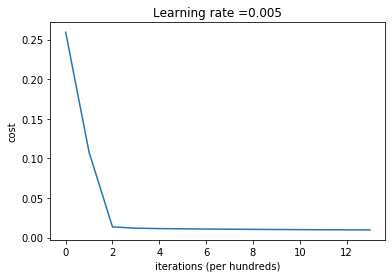

Train Accuracy: 1.0
Test Accuracy: 1.0
Parameters have been trained!


In [15]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [16]:
correct_prediction = tf.equal(tf.argmax(x_, 1),tf.argmax(y_train, 1))
     # Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({x1: X_test, y1: y_test}))

NameError: name 'pred' is not defined

In [19]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction


In [20]:
import scipy
from PIL import Image
from scipy import ndimage
import imageio

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "download.jpeg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

AttributeError: module 'scipy.ndimage' has no attribute 'imread'